In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

boston = datasets.load_boston()
X = boston['data']
y = boston['target']

In [2]:
def standard_scaler(X):
    means = X.mean(0)
    stds = X.std(0)
    return (X - means)/stds

In [5]:
class PoissonRegression:
    
    def fit(self, X, y, n_iter=1000, lr=0.00001, add_intercept=True, standardize = True):
        
        if standardize:
            X = standard_scaler(X)
        
        if add_intercept:
            ones = np.ones(len(X)).reshape((len(X), 1))
            X = np.append(ones, X, axis=1)
            
        self.X = X
        self.y = y
        
        beta_hats = np.zeros(X.shape[1])
        for i in range(n_iter):
            y_hat = np.exp(np.dot(X, beta_hats))
            dLdbeta = np.dot(X.T, y_hat - y)
            beta_hats = beta_hats - lr*dLdbeta
        
        self.beta_hats = beta_hats
        self.y_hat = y_hat

In [6]:
model = PoissonRegression()
model.fit(X, y)

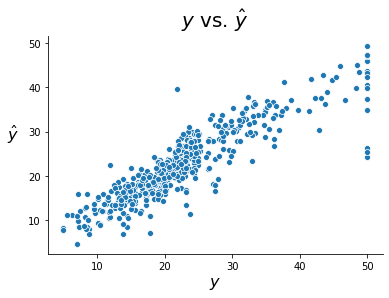

In [7]:
fig, ax = plt.subplots()
sns.scatterplot(model.y, model.y_hat)
ax.set_xlabel(r'$y$', size = 16)
ax.set_ylabel(r'$\hat{y}$', rotation = 0, size = 16, labelpad = 15)
ax.set_title(r'$y$ vs. $\hat{y}$', size = 20, pad = 10)
sns.despine()